<a href="https://colab.research.google.com/github/noreensharif/finalprojectkushublossom/blob/main/saspoloproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tensorflow

In [9]:
# Paths to dataset directories
train_dir = "/content/drive/My Drive/project_datasetnew/train_dir"
val_dir = "/content/drive/My Drive/project_datasetnew/val_dir"
test_dir = "/content/drive/My Drive/project_datasetnew/test_dir"

In [45]:
test_image_nonapple = "/content/drive/My Drive/project_datasetnew/test_dir/nonapple/Strawberry (1749)_0_5546.jpeg"
test_image_nonsaspolo = "/content/drive/My Drive/project_datasetnew/test_dir/nonsaspoloapple/Apple (147).jpeg"
test_image_saspolo = "/content/drive/My Drive/project_datasetnew/test_dir/saspoloapple/d2_0_9085.jpeg"

In [11]:

# Parameters
image_size = (224, 224)  # Input size for MobileNetV2
batch_size = 32          # Batch size
epochs = 12             # Number of epochs (adjust based on requirements)

In [12]:
# Preprocessing data (no augmentation as dataset is large)
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 12651 images belonging to 3 classes.


In [14]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1309 images belonging to 3 classes.


In [15]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 2264 images belonging to 3 classes.


In [16]:

# Load Pretrained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:

# Freeze the base model
base_model.trainable = False

In [18]:
# Add custom layers for classification
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(3, activation='softmax')  # 3 classes: saspolo, nonsaspolo, nonapple
])

In [19]:

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


396/396 ━━━━━━━━━━━━━━━━━━━━ 2382s 6s/step - accuracy: 0.8012 - loss: 0.4796 - val_accuracy: 0.9351 - val_loss: 0.1947
Epoch 2/12
396/396 ━━━━━━━━━━━━━━━━━━━━ 77s 190ms/step - accuracy: 0.9313 - loss: 0.1909 - val_accuracy: 0.9427 - val_loss: 0.1684
Epoch 3/12
396/396 ━━━━━━━━━━━━━━━━━━━━ 80s 187ms/step - accuracy: 0.9455 - loss: 0.1491 - val_accuracy: 0.9519 - val_loss: 0.1438
Epoch 4/12
396/396 ━━━━━━━━━━━━━━━━━━━━ 80s 183ms/step - accuracy: 0.9560 - loss: 0.1286 - val_accuracy: 0.9519 - val_loss: 0.1378
Epoch 5/12
396/396 ━━━━━━━━━━━━━━━━━━━━ 79s 198ms/step - accuracy: 0.9582 - loss: 0.1142 - val_accuracy: 0.9473 - val_loss: 0.1421
Epoch 6/12
396/396 ━━━━━━━━━━━━━━━━━━━━ 77s 185ms/step - accuracy: 0.9645 - loss: 0.1007 - val_accuracy: 0.9404 - val_loss: 0.1528
Epoch 7/12
396/396 ━━━━━━━━━━━━━━━━━━━━ 81s 183ms/step - accuracy: 0.9642 - loss: 0.1008 - val_accuracy: 0.9366 - val_loss: 0.1561
Epoch 8/12
396/396 ━━━━━━━━━━━━━━━━━━━━ 84s 189ms/step - accuracy: 0.9684 - loss: 0.0902 - val_

In [21]:

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


71/71 ━━━━━━━━━━━━━━━━━━━━ 542s 8s/step - accuracy: 0.9323 - loss: 0.1909
Test Accuracy: 91.74%


In [22]:

# Save the trained model
model.save('/content/drive/My Drive/project_datasetnew/kushublossom_model.h5')

In [23]:

# Class labels mapping
class_indices = train_generator.class_indices
print(f"Class indices: {class_indices}")
class_names = {v: k for k, v in class_indices.items()}  # Reverse mapping


Class indices: {'nonapple': 0, 'nonsaspoloapple': 1, 'saspoloapple': 2}


In [24]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

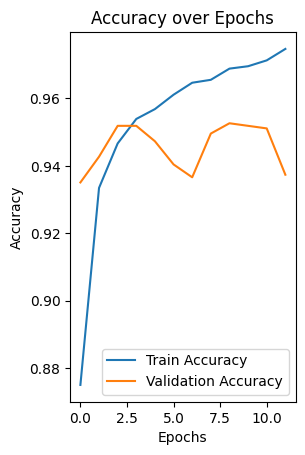

In [25]:

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

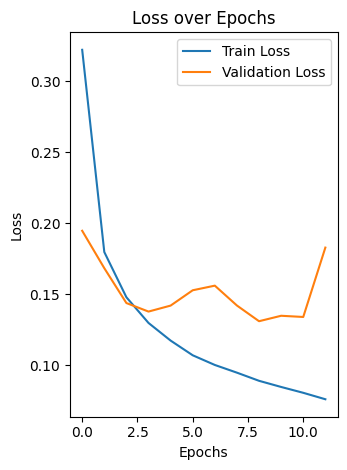

In [26]:
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:

# Function to predict a single image
def predict_image(image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=image_size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = predictions[0][predicted_class] * 100
    class_name = class_names[predicted_class]


    # Show image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {class_name} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    return class_name, confidence

Testing Non-Apple Image:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


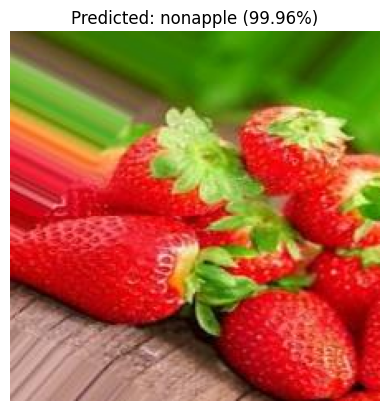

Testing Non-Saspolo Image:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


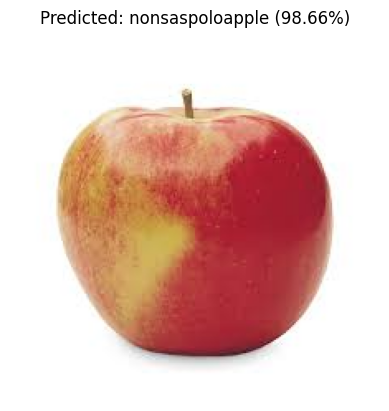

Testing Saspolo Image:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


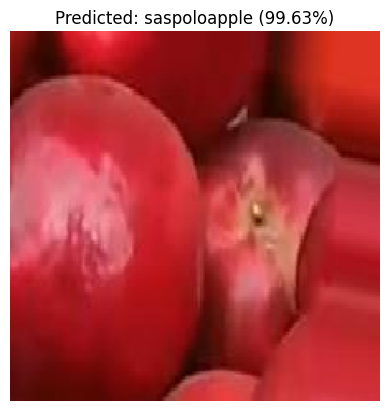

('saspoloapple', 99.63446259498596)

In [46]:
# Test the model with three specific images
print("Testing Non-Apple Image:")
predict_image(test_image_nonapple)

print("Testing Non-Saspolo Image:")
predict_image(test_image_nonsaspolo)

print("Testing Saspolo Image:")
predict_image(test_image_saspolo)